# Importing D-Wave Libraries

In [29]:
# Import networkx for graph tools
import networkx as nx

# Import dwave_networkx for d-wave graph tools/functions
import dwave_networkx as dnx

# Import dwave.system packages for the QPU
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
# Import matplotlib.pyplot to draw graphs on screen
import matplotlib
matplotlib.use("agg")
import matplotlib.pyplot as plt

import neal
import random as rand
import time
import numpy as np

%matplotlib inline

# Building our QUBO Problem, and qpu functions

In [2]:
def get_qubo(N,edges): # input a set of
    """Returns a dictionary representing a QUBO.
    Args:
        S(list of tuples): the coordinates of each node
    """
    
    Q = {}

    # Build QUBO 
    #Bonus for sites occupied to meet maximum condition
    
    for i in range(N):
        Q[(i,i)] = -1
 
    
    #Edge Constraints, # off diagonals
    for i in range(len(edges)):
        Q[(edges[i][0],edges[i][1])] = 3
    
    return Q

    
def run(Q, sampler, numruns = 10):
    """Runs the QUBO problem Q on the sampler provided.
    Args:
        Q(dict): a representation of a QUBO
        sampler(dimod.Sampler): a sampler that uses the QPU
    """   
    

    sample_set = sampler.sample_qubo(Q, num_reads=numruns)
    
    return sample_set



# Building our problem graph

In [3]:


# Create Nodes
nodes = [(1.19, 4.25),
(2.71, 3.48),
(1.19, 3.51),
(2, 3.38),
(1.12, 2.86),
(1.70, 2.42),
(2.36, 2.54),
(1.52, 1.48),
(2.15, 1.54),
(2.14, 1.87),
(1.72, 0.86),
(2.29, 0.87)]
edge_nodes =[]



def graphN(nodes):
    # Create empty graph
    G = nx.Graph()

    # Generate edges if they are close  within a distance of 1
    edge_nodes =[] #nodes numbers for generating objective function inside Qubo function Q
    edges = [] #coordinates for graph
    for i in range(len(nodes)-1):
        for j in range(i+1,len(nodes)):
            xi = nodes[i][0]
            xj = nodes[j][0]
            yi = nodes[i][1]
            yj = nodes[j][1]
            dij = ((xi-xj)**2 +(yi-yj)**2)**(1/2)
            if dij <= 1:
                edge =(nodes[i],nodes[j])
                edge_indices = (i,j)
                edge_nodes.append(edge_indices)
                edges.append(edge)

    G.add_edges_from(edges)
    return G, edge_nodes, edges

G, edge_nodes,edges = graphN(nodes)

# Running problem on Dwave qpu

In [14]:
Q = get_qubo(len(nodes),edge_nodes)

#Set Sampler             
sampler = EmbeddingComposite(DWaveSampler(profile='CDL'))

sample_set = run(Q, sampler)
    
print(sample_set)    

   0  1  2  3  4  5  6  7  8  9 10 11 energy num_oc. chain_.
0  1  0  0  1  1  0  0  0  0  1  0  1   -5.0       2     0.0
1  1  1  0  0  1  0  1  1  0  0  0  0   -5.0       3     0.0
2  1  1  0  0  1  0  1  0  0  0  0  1   -5.0       1     0.0
3  1  1  0  0  1  0  1  0  1  0  0  0   -5.0       2     0.0
4  1  0  0  1  0  1  0  0  0  0  0  1   -4.0       1     0.0
5  1  1  0  0  1  0  0  0  0  0  0  1   -4.0       1     0.0
['BINARY', 6 rows, 10 samples, 12 variables]


In [15]:
sample = list(sample_set.record[0][0])

print('Maximum independent set found is' ,sample)

Maximum independent set found is [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]


<Figure size 432x288 with 0 Axes>

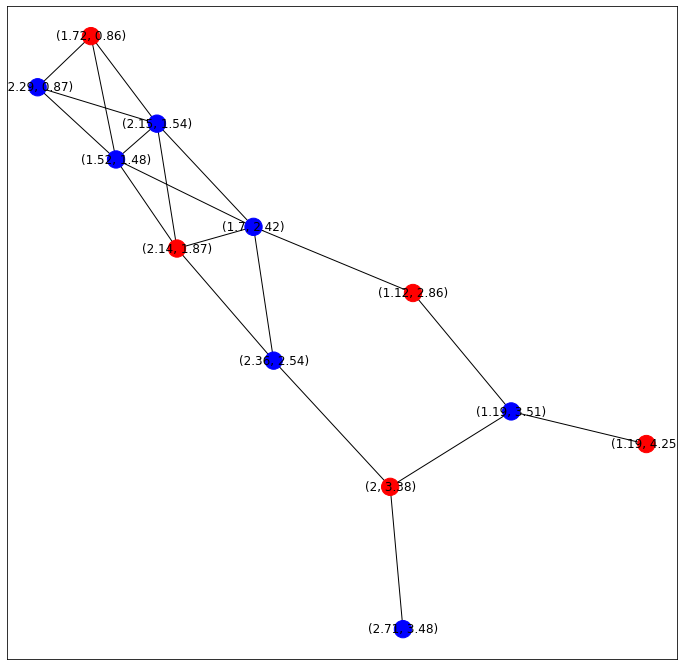

In [7]:
# Visualize the results

G, edge_nodes,edges = graphN(nodes)

def graph_visualize(sample,nodes,G):
    k = G.subgraph(sample)
    sample_nodes = []
    for i in range(len(sample)):
        if sample[i] == 1:
            sample_nodes.append(nodes[i])   
    notsample = list(set(G.nodes()) - set(sample_nodes))
    othersubgraph = G.subgraph(notsample)
    pos = nx.spring_layout(G)
    plt.figure()
    color_map = []
    for node in sample:
        if node ==1:
            color_map.append('red')
        else: 
            color_map.append('blue')     
    plt.figure(3,figsize=(12,12))         
    # Save original problem graph
    original_name = "antenna_plot_original.png"
    nx.draw_networkx(G, pos=pos,node_color=color_map,with_labels=True)
    #plt.savefig(original_name, bbox_inches='tight')
    plt.show()
    return

graph_visualize(sample,nodes,G)

# Simulated Annealing

In [4]:
Q = get_qubo(len(nodes),edge_nodes)

#Set Sampler             
sampler = neal.SimulatedAnnealingSampler()
sample_set = run(Q, sampler,numruns = 200)
    
print(sample_set)    

     0  1  2  3  4  5  6  7  8  9 10 11 energy num_oc.
0    1  0  0  1  1  0  0  0  0  1  1  0   -5.0       1
1    1  1  0  0  1  0  0  0  0  1  0  1   -5.0       1
2    1  0  0  1  1  0  0  0  0  1  0  1   -5.0       1
3    1  0  0  1  1  0  0  0  0  1  1  0   -5.0       1
4    1  0  0  1  1  0  0  0  0  1  0  1   -5.0       1
5    1  0  0  1  1  0  0  0  0  1  0  1   -5.0       1
6    1  1  0  0  1  0  1  0  0  0  1  0   -5.0       1
7    1  1  0  0  1  0  1  1  0  0  0  0   -5.0       1
8    1  1  0  0  1  0  0  0  0  1  1  0   -5.0       1
10   1  0  0  1  1  0  0  0  0  1  1  0   -5.0       1
11   1  1  0  0  1  0  1  1  0  0  0  0   -5.0       1
12   1  0  0  1  1  0  0  0  0  1  1  0   -5.0       1
13   1  0  0  1  1  0  0  0  0  1  1  0   -5.0       1
14   1  0  0  1  1  0  0  0  0  1  0  1   -5.0       1
15   1  0  0  1  1  0  0  0  0  1  0  1   -5.0       1
16   1  1  0  0  1  0  1  0  0  0  0  1   -5.0       1
17   1  1  0  0  1  0  0  0  0  1  1  0   -5.0       1
18   1  0 

In [5]:
sample = list(sample_set.record[0][0])
E_best = list(sample_set.record[0])[1]

<Figure size 432x288 with 0 Axes>

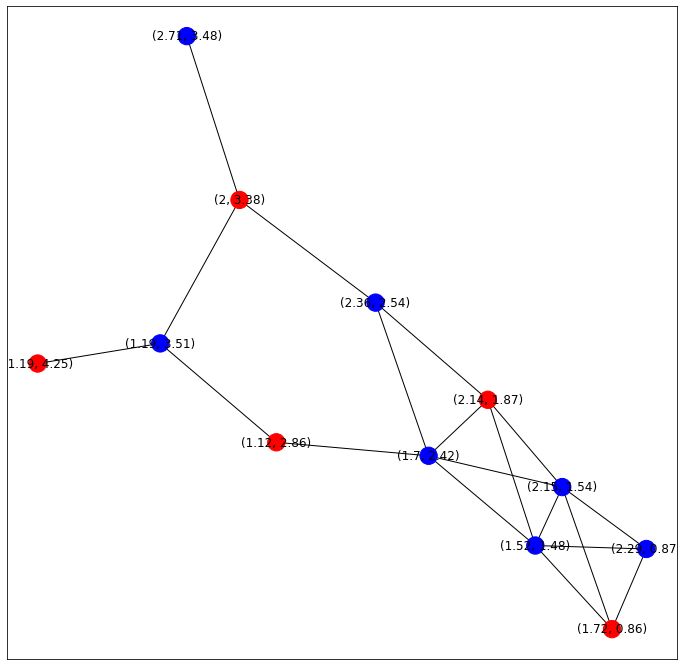

In [8]:
# Visualize the results
graph_visualize(sample,nodes,G)

# Generating best E vs Number of nodes in the graph and computation time


In [26]:
# Generate calculation time and best energy for each N
N = 40
num_runs = 20

def time_benchmark_vs_N(N,num_runs):
    
    # Generating N
    Ns=[]
    Es = []
    del_times = []

    def gen_node(N):    
   
        rng = N/4
        nodes = []
        for i in range(N):
            pcoord = (rand.uniform(1,rng),rand.uniform(1,rng))
            nodes.append(pcoord)

        return nodes    
    
    
    def dwave_anneal(N,num_runs):
            start = time.time()   
            nodes = gen_node(N)   # output node coords
            G, edge_nodes,edges = graphN(nodes)   # create problem graph for N

            #Generate qubo
            Q = get_qubo(len(nodes),edge_nodes)

            #Set Sampler             
            sampler = neal.SimulatedAnnealingSampler()
            sample_set = run(Q, sampler,num_runs)
            sample = list(sample_set.record[0][0])
            E_best = list(sample_set.record[0])[1]
            Es.append(E_best)

            end = time.time()                               #end---------------

            del_t = end  - start
            return del_t, E_best
        
    #Loop over N's
    for i in range(1,N+1):
                                  #start------------
        Ns.append(i)
        
        
        del_t, E_best = dwave_anneal(i,num_runs)
        del_times.append(del_t)
    return Ns,Es,del_times

Ns,Es,del_times = time_benchmark_vs_N(N,num_runs)

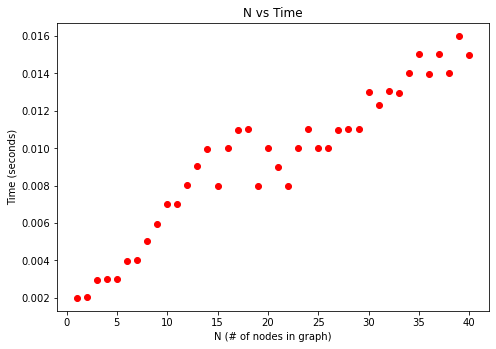

In [34]:
#Generate Graph
def plot_time_benchmark(Es,Ns,del_times):
    

    calc_times = del_times
    Ns = Ns
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.scatter(Ns, del_times, color='r')
    #m, b = np.polyfit(Ns, del_times, 1)     #bestfit
    #plt.plot(Ns, m*Ns+b)
    
    #ax.scatter(grades_range, boys_grades, color='b')     other plots
    ax.set_xlabel('N (# of nodes in graph)')
    ax.set_ylabel('Time (seconds)')
    ax.set_title('N vs Time')
    #plt.legend()
    plt.show()
    return

plot_time_benchmark(Es,Ns,del_times)

# To do
    - set to proper coordinates
    - draw circles
    - put in anneal schedule
    - benchmark run time
    - generate arbitrary larger graph
    - hybrid solver

In [ ]:
# Setting tuples as correct coordinates


pos={'0':(1,0),'1':(1,1),'2':(2,3),'3':(3,2),'4':(0.76,1.80),'5':(0,2)}    
nx.set_node_attributes(G, pos, 'coord')

In [ ]:
https://support.dwavesys.com/hc/en-us/community/posts/360050243474-anneal-schedule-details